## Analyzing the Data 

In [246]:
# Imports
import sqlite3
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Statistical Testing
Conduct hypothesis testing and use linear regression to make recommendations for the new movie studio.

In [247]:
# Grabbing the merged_data df from data_cleaning_notebook.ipynb
merged_data = pd.read_pickle("merged_data.pkl")
merged_data

,movie_id,primary_title,genres,individual_genre,runtime_minutes,title,studio,domestic_gross,foreign_gross,year,averagerating,numvotes,director_id,director_name,total_gross
0,tt0315642,Wazir,"Action,Crime,Drama",Action,103.0,Wazir,Relbig.,1100000.0,0.0,2016,7.1,15378,nm2349060,Bejoy Nambiar,1100000.0
1,tt0315642,Wazir,"Action,Crime,Drama",Crime,103.0,Wazir,Relbig.,1100000.0,0.0,2016,7.1,15378,nm2349060,Bejoy Nambiar,1100000.0
2,tt0315642,Wazir,"Action,Crime,Drama",Drama,103.0,Wazir,Relbig.,1100000.0,0.0,2016,7.1,15378,nm2349060,Bejoy Nambiar,1100000.0
3,tt0337692,On the Road,"Adventure,Drama,Romance",Adventure,124.0,On the Road,IFC,744000.0,8000000.0,2012,6.1,37886,nm0758574,Walter Salles,8744000.0
4,tt0337692,On the Road,"Adventure,Drama,Romance",Drama,124.0,On the Road,IFC,744000.0,8000000.0,2012,6.1,37886,nm0758574,Walter Salles,8744000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7764,tt8427036,Helicopter Eela,Drama,Drama,135.0,Helicopter Eela,Eros,72000.0,0.0,2018,5.4,673,nm1224879,Pradeep Sarkar,72000.0
7765,tt9078374,Last Letter,"Drama,Romance",Drama,114.0,Last Letter,CL,181000.0,0.0,2018,6.4,322,nm0412517,Shunji Iwai,181000.0
7766,tt9078374,Last Letter,"Drama,Romance",Romance,114.0,Last Letter,CL,181000.0,0.0,2018,6.4,322,nm0412517,Shunji Iwai,181000.0
7767,tt9151704,Burn the Stage: The Movie,"Documentary,Music",Documentary,84.0,Burn the Stage: The Movie,Trafalgar,4200000.0,16100000.0,2018,8.8,2067,nm10201503,Jun-Soo Park,20300000.0


## 4.1 Define Business Goals

- Use statistical analysis to find insights that can be transformed into concrete recommendations for movie production.
- Example goals could be:
  - Identify genres with the highest ROI.
  - Analyze how budget affects box office revenue.

## 4.2 Conduct Statistical Test

### Studios in the box office

Use an ANOVA test to see whether some studios perform significantly better in the box office than others

- We will use an ANOVA because we want to compare multiple variables together -- see how different studios perform in the box office in 2018 (the most recent year of our data)

**Null Hypothesis:** All studios on average perform the same in the box office in 2018

**Alternative Hypothesis:** Some studios on average perform significantly differently in the box office than others in 2018

In [248]:
# 2018 is the latest year in our data
merged_data["year"].value_counts()

year
2016    1062
2015    1020
2011     959
2012     925
2014     889
2017     804
2013     764
2018     722
2010     624
Name: count, dtype: int64

In [249]:
merged_data["studio"].value_counts()

studio
Uni.         420
Fox          378
WB           346
IFC          327
BV           327
            ... 
SEG            1
ICir           1
CAVU           1
Dreamwest      1
AM             1
Name: count, Length: 216, dtype: int64

In [250]:
data_2018 = merged_data[merged_data["year"] == 2018]
data_2018


,movie_id,primary_title,genres,individual_genre,runtime_minutes,title,studio,domestic_gross,foreign_gross,year,averagerating,numvotes,director_id,director_name,total_gross
240,tt0800054,The Guardians,"Comedy,Family",Comedy,88.0,The Guardians,MBox,177000.0,0.0,2018,7.8,68,nm0401827,Chris Hummel,177000.0
241,tt0800054,The Guardians,"Comedy,Family",Family,88.0,The Guardians,MBox,177000.0,0.0,2018,7.8,68,nm0401827,Chris Hummel,177000.0
242,tt6213362,The Guardians,"Drama,War",Drama,138.0,The Guardians,MBox,177000.0,0.0,2018,6.8,1314,nm0064741,Xavier Beauvois,177000.0
243,tt6213362,The Guardians,"Drama,War",War,138.0,The Guardians,MBox,177000.0,0.0,2018,6.8,1314,nm0064741,Xavier Beauvois,177000.0
244,tt6901956,The Guardians,"Action,Adventure,Comedy",Action,46.0,The Guardians,MBox,177000.0,0.0,2018,4.1,7,nm7014443,Sebastian Garcia Lorenzo,177000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7764,tt8427036,Helicopter Eela,Drama,Drama,135.0,Helicopter Eela,Eros,72000.0,0.0,2018,5.4,673,nm1224879,Pradeep Sarkar,72000.0
7765,tt9078374,Last Letter,"Drama,Romance",Drama,114.0,Last Letter,CL,181000.0,0.0,2018,6.4,322,nm0412517,Shunji Iwai,181000.0
7766,tt9078374,Last Letter,"Drama,Romance",Romance,114.0,Last Letter,CL,181000.0,0.0,2018,6.4,322,nm0412517,Shunji Iwai,181000.0
7767,tt9151704,Burn the Stage: The Movie,"Documentary,Music",Documentary,84.0,Burn the Stage: The Movie,Trafalgar,4200000.0,16100000.0,2018,8.8,2067,nm10201503,Jun-Soo Park,20300000.0


In [285]:
# since we have multiple rows for each movie_id (one row for each
# genre and director), we have to groupby movie_id

gross_by_movie_id_2018 = data_2018.groupby("movie_id")[["runtime_minutes", "studio", "total_gross"]].max()
gross_by_movie_id_2018

,runtime_minutes,studio,total_gross
movie_id,,,
tt0800054,88.0,MBox,177000.0
tt0804509,100.0,WB,172500000.0
tt1034415,152.0,Amazon,7900000.0
tt1072748,99.0,LGF,25100000.0
tt1213641,141.0,Uni.,105700000.0
...,...,...,...
tt8404272,101.0,WGUSA,82847000.0
tt8427036,135.0,Eros,72000.0
tt9042690,89.0,CJ,111000.0


In [286]:
gross_by_studio_2018 = gross_by_movie_id_2018.groupby("studio")["total_gross"].sum().sort_values(ascending=False)
gross_by_studio_2018

studio
BV       5.469700e+09
WB       5.073300e+09
Uni.     4.043222e+09
Par.     2.364300e+09
Fox      2.128500e+09
             ...     
OutF     7.350000e+04
Super    5.210000e+04
Icar.    1.780000e+04
Men.     1.220000e+04
Grav.    1.700000e+03
Name: total_gross, Length: 67, dtype: float64

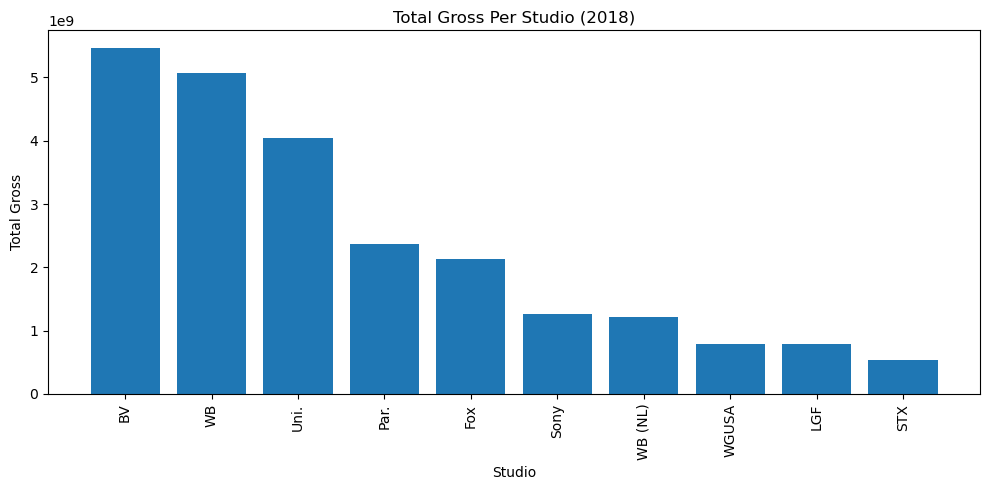

In [287]:
# Plot the top 10 grossing studios

fig, ax = plt.subplots(figsize=(10,5))

top_10_studios_2018 = list(gross_by_studio_2018.keys())[:10]
top_10_gross_2018 = list(gross_by_studio_2018.values)[:10]

ax.bar(top_10_studios_2018, top_10_gross_2018)

ax.set_title("Total Gross Per Studio (2018)")
ax.set_xlabel("Studio")
ax.set_ylabel("Total Gross")
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

In [254]:
# "Box office success" can be defined as reaching the revenue
# of the middle studio among the top 10 in 2018.

box_office_success_goal = top_10_gross_2018[4]

print(f"The middle-grossing studio among the top 10: {top_10_studios_2018[4]} with a total annual gross profit of ${box_office_success_goal:,}")


The middle-grossing studio among the top 10: Fox with a total annual gross profit of $2,128,500,000.0


### Genres in the box office

Use an ANOVA test to see whether some genres perform significantly better in the box office than others using 2018 data like in the above.

- Use hypothesis testing (e.g., t-tests or ANOVA) to determine if certain variables (e.g., genre, budget) significantly impact movie success.

**Null Hypothesis:** All genres on average perform the same in the box office in 2018

**Alternative Hypothesis:** Some genres on average perform significantly differently in the box office than others in 2018

In [255]:
# check to see if there are any null values in total_gross
data_2018["total_gross"].isnull().sum()

0

In [256]:
# Getting median total gross reveue for each individual genre
gross_by_genre_2018 = data_2018.groupby("individual_genre")["total_gross"].sum().sort_values(ascending=False)
gross_by_genre_2018

individual_genre
Adventure      1.606630e+10
Action         1.440009e+10
Comedy         9.288034e+09
Drama          6.961431e+09
Sci-Fi         6.558036e+09
Thriller       4.002375e+09
Animation      3.890969e+09
Fantasy        3.672559e+09
Horror         2.396202e+09
Biography      2.072138e+09
Family         1.973797e+09
Romance        1.899027e+09
Crime          1.751435e+09
Mystery        1.589606e+09
Music          9.370327e+08
Documentary    6.968814e+08
History        4.765831e+08
Musical        3.950000e+08
Sport          3.025210e+08
War            2.315100e+07
Western        2.400000e+06
Name: total_gross, dtype: float64

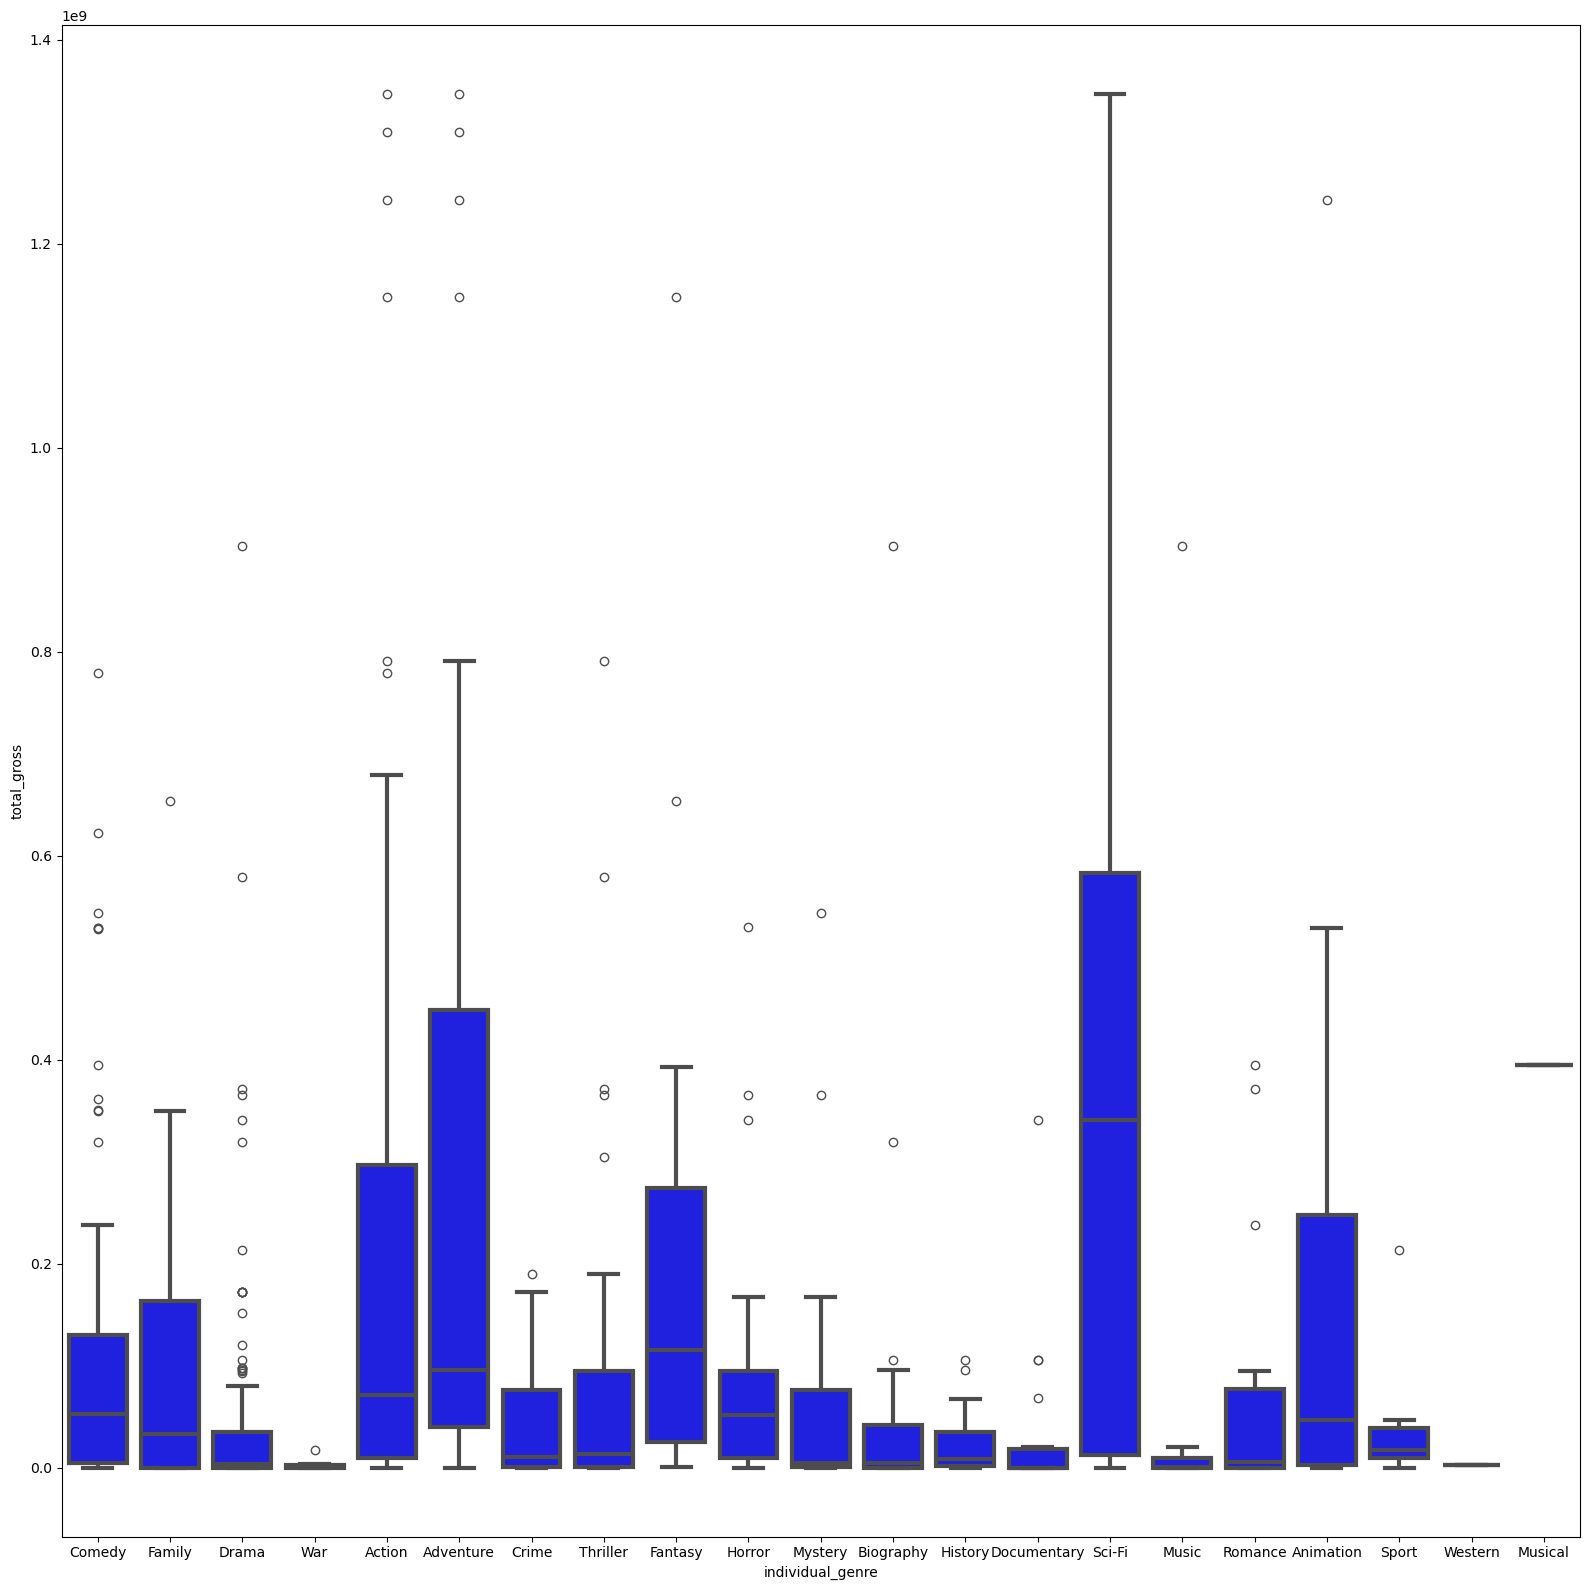

In [257]:
fig, ax = plt.subplots(figsize=(16, 16))

sns.boxplot(
    x="individual_genre",
    y="total_gross",
    data=data_2018,
    ax=ax,
    color="blue",
    linewidth=3
)

plt.tight_layout()

In [258]:
# define our alpha
alpha = 0.01

# get the list of genres in data
genres = list(data_2018["individual_genre"].unique())

# create dictionary of df for each genre
total_gross_data_per_genre_2018 = {}
for genre in genres:
    total_gross_data_per_genre_2018[genre] = list(data_2018[data_2018["individual_genre"] == genre]["total_gross"].values)

In [259]:
result = stats.f_oneway(*total_gross_data_per_genre_2018.values())
f_stat, p_value = result

p_value

4.0583942791545226e-18

In [260]:
p_value < alpha

True

Our p-value is less than our alpha, which means we can reject the null hypothesis.

In [ ]:
# *** NEED TO ANALYZE THIS!!!!! ***
# Look at the OLS ANOVA table
formula = "total_gross ~ C(individual_genre)"
anova_sm = ols(formula=formula, data=data_2018).fit()
anova_sm.summary()

We know that there is a difference in box office success between genres, but we want to know which genres are significantly different. We will perform a Tukey's HSD Post-Hoc Test to find these genres.

In [ ]:
tk_hsd = pairwise_tukeyhsd(data_2018["total_gross"], data_2018["individual_genre"], alpha=alpha)
tk_hsd.summary()

In [264]:
top_genre_2018 = list(gross_by_genre_2018.keys())[0]
top_genre_gross_2018 = list(gross_by_genre_2018.values)[0]

In [265]:
# Find all the genres that reach the total gross profit goal
top_genres_2018 = [genre for genre in gross_by_genre_2018.keys() if gross_by_genre_2018[genre] >= box_office_success_goal]
top_genres_2018

['Adventure',
 'Action',
 'Comedy',
 'Drama',
 'Sci-Fi',
 'Thriller',
 'Animation',
 'Fantasy',
 'Horror']

In [269]:
print(f"The top-performing genre of 2018 was {top_genre_2018} with total gross profit of ${top_genre_gross_2018:,}, reaching our goal of ${box_office_success_goal:,}. However, there are other genres that can also surpass our goal: {top_genres_2018}")

The top-performing genre of 2018 was Adventure with total gross profit of $16,066,296,500.0, reaching our goal of $2,128,500,000.0. However, there are other genres that can also surpass our goal: ['Adventure', 'Action', 'Comedy', 'Drama', 'Sci-Fi', 'Thriller', 'Animation', 'Fantasy', 'Horror']


### Runtime vs Total Gross Profit

Now that we know Sci-Fi is the top-performing genre, let's take a look at the average runtime of all the top performing genres of 2018. We can also do an ANOVA test to see whether there is an average runtime that generates the most revenue in 2018.

**Null Hypothesis:** All runtimes on average perform the same in the box office in 2018

**Alternative Hypothesis:** Some runtimes on average perform significantly differently in the box office than others in 2018

In [276]:
# Find average runtimes of each top performing genre of 2018
top_genre_runtime_2018 = data_2018[data_2018["individual_genre"].isin(top_genres_2018)].groupby("individual_genre")["runtime_minutes"].median().sort_values(ascending=False)
top_genre_runtime_2018

individual_genre
Fantasy      116.0
Action       114.0
Sci-Fi       110.0
Drama        107.0
Thriller     106.0
Adventure    103.5
Comedy       103.0
Horror        98.0
Animation     96.5
Name: runtime_minutes, dtype: float64

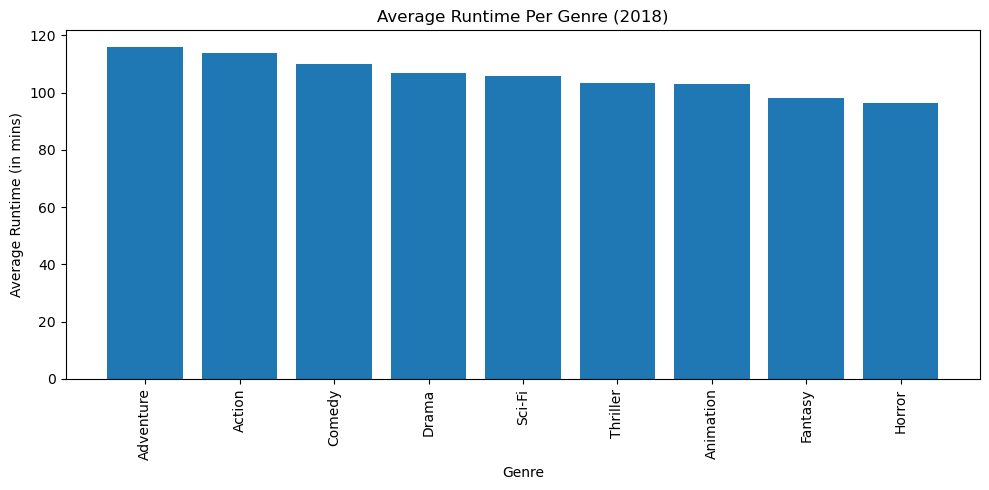

In [277]:
# graph the average runtimes for each genre

fig, ax = plt.subplots(figsize=(10,5))

ax.bar(top_genres_2018, top_genre_runtime_2018.values)

ax.set_title("Average Runtime Per Genre (2018)")
ax.set_xlabel("Genre")
ax.set_ylabel("Average Runtime (in mins)")
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

In [280]:
data_2018["runtime_minutes"].sort_values(ascending=False)

7191    189.0
7193    189.0
7192    189.0
7403    164.0
7404    164.0
        ...  
6093     45.0
6092     45.0
6091     45.0
4591     45.0
7557      NaN
Name: runtime_minutes, Length: 722, dtype: float64

In [284]:
# clean runtime data -- since there's only 1 row with a null runtime
# we can drop it
runtime_2018 = data_2018.dropna(subset=["runtime_minutes"])
runtime_2018["runtime_minutes"].sort_values(ascending=False)

7191    189.0
7193    189.0
7192    189.0
7403    164.0
7404    164.0
        ...  
6094     45.0
6093     45.0
6092     45.0
6091     45.0
4591     45.0
Name: runtime_minutes, Length: 721, dtype: float64

In [291]:
gross_by_movie_id_2018

,runtime_minutes,studio,total_gross
movie_id,,,
tt0800054,88.0,MBox,177000.0
tt0804509,100.0,WB,172500000.0
tt1034415,152.0,Amazon,7900000.0
tt1072748,99.0,LGF,25100000.0
tt1213641,141.0,Uni.,105700000.0
...,...,...,...
tt8404272,101.0,WGUSA,82847000.0
tt8427036,135.0,Eros,72000.0
tt9042690,89.0,CJ,111000.0


In [290]:
# put rows into buckets of runtime
# < 100 mins
# 100 - 109 mins
# 110 - 119 mins
# etc.

# since we have multiple rows per movie, we want to groupby movie_id
# find the average runtime
gross_by_runtime_2018 = gross_by_movie_id_2018.groupby("runtime_minutes")["total_gross"].median().sort_values(ascending=False)
gross_by_runtime_2018

runtime_minutes
143.0    1.147800e+09
134.0    9.036000e+08
147.0    7.912000e+08
149.0    6.788000e+08
142.0    5.792000e+08
             ...     
46.0     1.770000e+05
136.0    1.030000e+05
93.0     8.390000e+04
123.0    7.100000e+04
77.0     2.210000e+04
Name: total_gross, Length: 77, dtype: float64

In [293]:
# ANOVA test of average runtime vs total gross

# bin runtimes into increments of 10
# < 100 mins
# 100 - 109 mins
# 110 - 119 mins
# etc.

# use quartiles instead (every IQR)
# scatter plot runtime vs total_gross to find sweet spot of run time
# bin based on IQR and sweet spot

## 4.3 Simple Linear Regression
- Implement a simple linear regression model to quantify the relationship between one numeric feature (e.g., budget) and a response variable (e.g., revenue).

## Insights
- I've been using 2018 data because it's the most recent data, and we should focus on annual gross profit
- The goal of total annual gross profit: $2,128,500,000
- The top-performing genre of 2018 was Adventure with total gross profit of $16,066,296,500, reaching our goal of $2,128,500,000. However, there are other genres that can also surpass our goal: ['Adventure', 'Action', 'Comedy', 'Drama', 'Sci-Fi', 'Thriller', 'Animation', 'Fantasy', 'Horror']


- baseline -- defining success (anbita)
- top genres -- which genres will get us to our baseline? Post-hoc (is there sig difference in top genres?) (anbita)
- franchise (plays into the director loyalty, court a director / an IP) (jayla)
- director vs studio loyalty (consistency of director for the franchise, sticking with this individual for the whole thing) (director vs all other directors (t-test)) (jayla)
- runtime across top genres vs total_gross (sweet spot vs the other runtimes) (anbita)

Find slides, clean up notebook to copy